In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

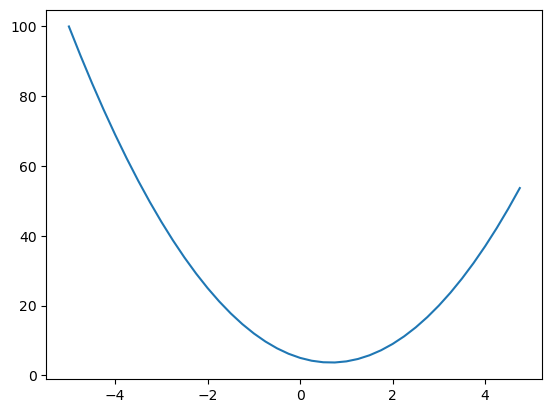

In [4]:
xs=np.arange(-5,5,0.25)
ys=f(xs)
plt.plot(xs,ys)

In [5]:
h=0.000001
x=3.0
f(x+h)

20.000014000003002

In [6]:
(f(x+h)-f(x))/h #slope calculation 

14.000003002223593

In [7]:
x=-3.0
(f(x+h)-f(x))/h #slope calculation 

-21.999997002808414

In [8]:
x=2/3
(f(x+h)-f(x))/h #slope calculation 

2.999378523327323e-06

In [9]:
a= 2.0
b = -3.0
c = 10.0
d=a*b+c
print(d)

4.0


In [10]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b + c
a += h
d2=a*b + c

print("d1",d1)  #d1 is the slope
print("d2",d2)  #d2 is the slope
print("slope",(d2-d1)/h) #slope calculation")

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [11]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b + c
b += h
d2=a*b + c

print("d1",d1)  #d1 is the slope
print("d2",d2)  #d2 is the slope
print("slope",(d2-d1)/h) #slope calculation")

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [12]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b + c
c += h
d2=a*b + c

print("d1",d1)  #d1 is the slope
print("d2",d2)  #d2 is the slope
print("slope",(d2-d1)/h) #slope calculation")

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [13]:
class Value:
    def __init__(self,data, _children=(), _op='',label=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
        self.backward=lambda: None
        self.label=label
        self.grad=0
    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self,other):
        return Value(self.data+other.data, (self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data*other.data, (self,other),'*')
    def tanh(self):
        x= self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,), 'tanh')
        return out
    
    
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e = a*b; e.label='e'
print(a+b)  #addition
print(a*b)  #multiplication
d=a*b + c; d.label='d'
print(d)    
f= Value(-2.0, label='f')
L= d*f; L.label='L'

Value(-1.0)
Value(-6.0)
Value(4.0)


In [14]:
d._prev,d._op

({Value(-6.0), Value(10.0)}, '+')

In [15]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

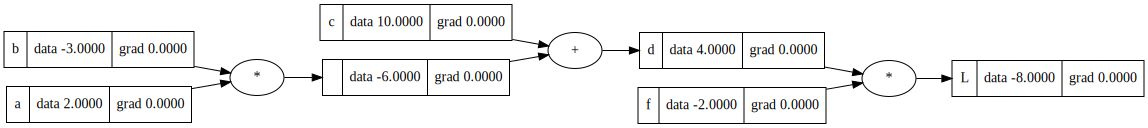

In [16]:
draw_dot(L)

In [17]:
# dd/dc ?
# d = c+ e
# (f(x+h)-f(x))/h
# ((c+h+e)- (c + e))/h
# (c+h+e-c-e)/h
# h/h
# 1.0
# dd/dc = 1.0
# dd/de = 1.0
# d = c + e


In [18]:
L = d * f
# dL/dd =?  #derivative of L with respect to d
# (f(x+h)-f(x))/h
# ((d+h)*f - d*f)/h
# (d*f + h*f - d*f)/h
# (h*f)/h
# f

In [19]:
# ?dd / dc =1.0
# dd / de =1.0
# d =c+ e

# WANT:
# dl / dc =(dl/dd) * (dd/ dc)

# KNOOW:
# dl / dd
# dd / dc

In [20]:
# dl / de = -2.0
# e = a * b
# de /da?
# dl / da =(dl / de) * (de / da)


In [21]:
L.grad=1.0
f.grad= 4.0
d.grad=2.0
e.grad=-2.0
c.grad=-2.0
a.grad=-2.0 * -3.0
b.grad=-2.0 * 2.0

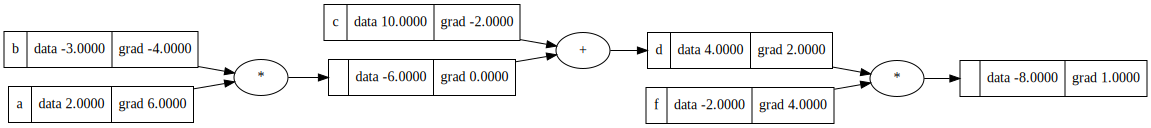

In [22]:
draw_dot(L)

In [23]:
a.data +=0.01 *a.grad
b.data +=0.01 *b.grad
c.data +=0.01 *c.grad
f.data +=0.01 *f.grad

e = a*b
d = e + c
L = d*f
print(L.data)

-7.286496


In [24]:
def lol():  #staging area
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  a.data += h
  b = Value(-3.0, label='b')
  b.data += h
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  e.data  += h
  d = e + c; d.label = 'd'
  d.data+=h
  f = Value(-2.0+h, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()

-2.0009980000015304


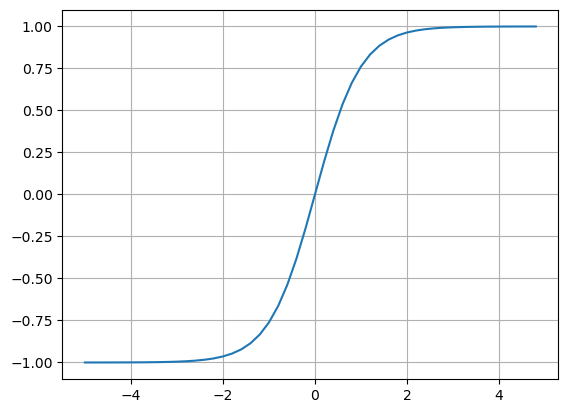

In [25]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2))); plt.grid()

In [26]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [27]:
# draw_dot(n)

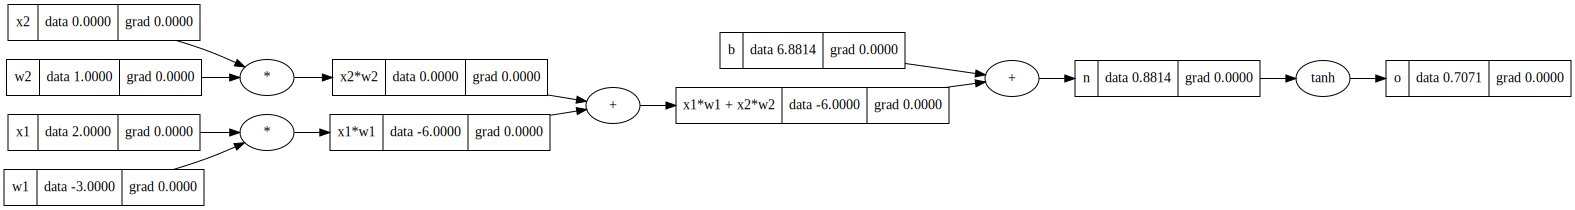

In [28]:
draw_dot(o)

In [29]:
# n.grad = 0.5
# x1w1x2w2.grad = 0.5
# x1w1.grad = 0.5
# x2w2.grad = 0.5
# x2.grad = w2.grad * x2w2.grad
# w2.grad = x2.grad * x2w2.grad
# x1.grad= w1.data * x1w1.grad
# w1.grad= x1.data * x2w2.grad

In [30]:
# o.grad=1.0

In [31]:
# 1 - o.data**2

In [33]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def f(x):
  return 3*x**2 - 4*x + 5

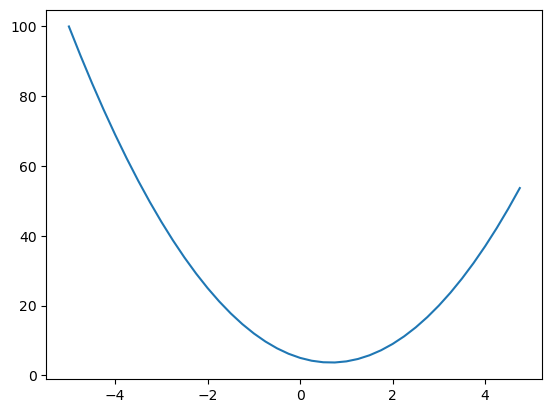

In [35]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [36]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [37]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [38]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [39]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [40]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()



In [41]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [42]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

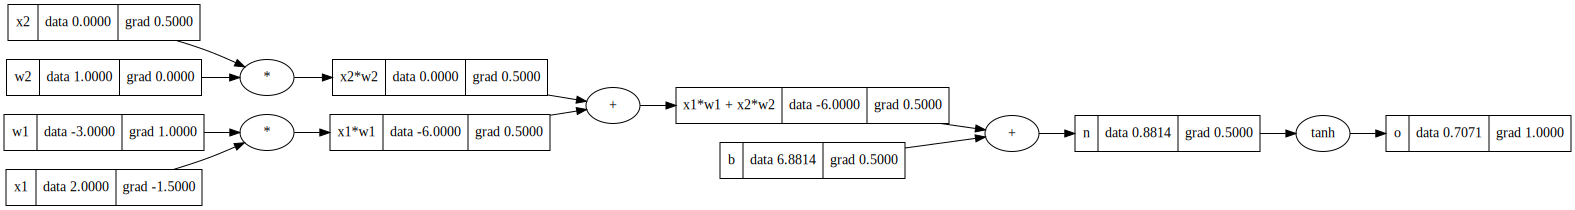

In [43]:
draw_dot(o)

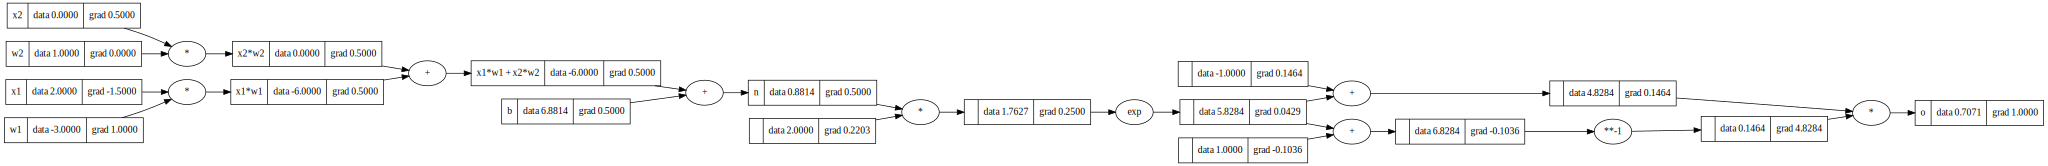

In [44]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [45]:
import torch

In [46]:

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [47]:

class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [48]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.656344240282951)

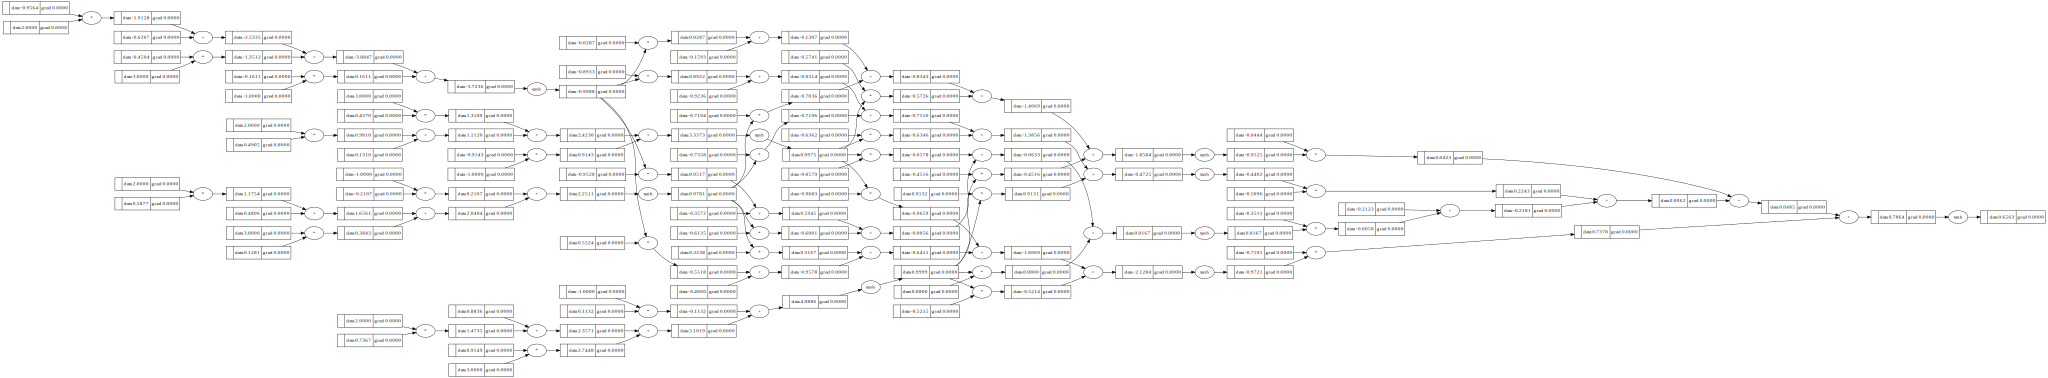

In [49]:
draw_dot(n(x))

In [50]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [51]:

for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 4.0199361184520175
1 5.005378986304809
2 3.000844893478906
3 2.662082250466169
4 0.1661452041493756
5 0.05676087354681217
6 0.04132612851751804
7 0.03344537253755627
8 0.028509511443260072
9 0.025069276619084483
10 0.02250482078199241
11 0.020502361346073722
12 0.018884621851661815
13 0.01754329554954649
14 0.016408188012649358
15 0.015431646934464175
16 0.014580087344402975
17 0.013829093545937442
18 0.013160446438973739
19 0.012560244453651696


In [52]:
ypred

[Value(data=0.9545529909107239),
 Value(data=-0.9353381789245427),
 Value(data=-0.9377810047363222),
 Value(data=0.9505787561662503)]

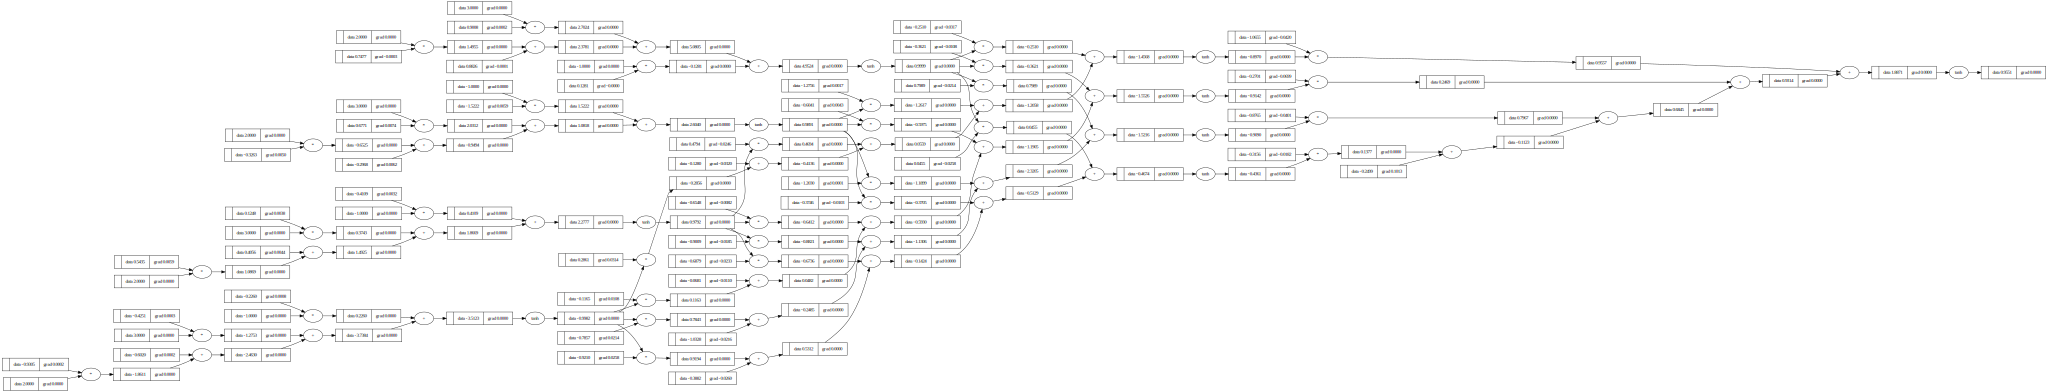

In [58]:
draw_dot(n(x))